# Análisis de presupuesto

### Librerias necesarias

In [117]:
import pandas as pd
import matplotlib.pyplot as plt

### Cargando datos iniciales

In [118]:
quotations_raw = pd.read_excel('Quotationds_data.xlsx')

In [119]:
quotations_raw.head(10)

,Medico,Procedimiento,Convenio,CustomerId,CustomerName,invoiceId,items,Cantidad,precio_unitario,precio
0,NO INDICADO,CESAREA,CONVENIO: ASSA COMPAÑÍA DE SEGUROS S.A. (EBS),207080166,VILLALOBOS MORERA KATHIA ROCIO,170558.0,PRECIO SALA DE OPERACIONES (60 MINUTOS),NaN,NaN,162240.000
1,CACERES CHACON ADRIAN,CRANEO SINOSTOSIS CX SUTURECTOMIA,CONVENIO: PROGRAMA DE BENEFICIOS MI VIDA,NaN,GRANADOS ESPINOZA FABIANA DANIELA,170153.0,PAQUETE DESCART. INSUMOS,1.0,56500.000,56500.000
2,ZAFRANI ZEBEDE JACOBO,COLECISTECTOMÍA LAPAROSCÓPICA,CONVENIO: PROGRAMA DE BENEFICIOS MI VIDA,NaN,NaN,170381.0,CIRUGIA MENOR,1.0,110100.640,88080.510
3,ZUÑIGA PEREZ ALBA,HERNIOPLASTIA INGUINAL LAPAROSCOPICA,CONVENIO: ASSA COMPAÑÍA DE SEGUROS S.A. (EBS),112790932,REY SOTO MOISES RAMON,170082.0,PAQUETE DESCART. INSUMOS,1.0,NaN,56500.000
4,CONTRERAS SOARES FERNANDO,REPARACIÓN ARTROSCÓPICA DE MANGUITO ROTADOR + ...,CONVENIO: PROGRAMA DE BENEFICIOS MI VIDA,NaN,FISCHEL KOPPER MAX ALBERTO,170728.0,INSUMO CASA COMERCIAL,1.0,1.117,1.061
5,VIQUEZ QUESADA NATHALY YULIANA,HISTERECTOMÍA LAPAROSCÓPICA,NaN,111640275,JOHANNING CORDERO JULIANA,170873.0,CIRUGIA MAYOR,1.0,201455.280,161164.220
6,ACUÑA NAVAS MARIA JOSE,CESAREA,NaN,304570339,GOMEZ NAVARRO YANIL DEL ROSARIO,152592.0,Maternidad.\nPresupuesto No.\n152592,NaN,NaN,NaN
7,ZAFRANI ZEBEDE JACOBO,COLECISTECTOMÍA LAPAROSCÓPICA,CONVENIO: PROGRAMA DE BENEFICIOS MI VIDA,NaN,NaN,170381.0,PRECIO POR MINUTO,60.0,181636.200,145309.200
8,CONTRERAS SOARES FERNANDO,REPARACIÓN ARTROSCÓPICA DE MANGUITO ROTADOR + ...,CONVENIO: PROGRAMA DE BENEFICIOS MI VIDA,NaN,FISCHEL KOPPER MAX ALBERTO,170728.0,PAQUETE DESCART. INSUMOS,1.0,67800.000,67800.000
9,NO INDICADO,CESAREA,CONVENIO: ASSA COMPAÑÍA DE SEGUROS S.A. (EBS),207080166,VILLALOBOS MORERA KATHIA ROCIO,170558.0,RECUPERACION 1 HORA (CESAREA),NaN,NaN,104177.000


In [120]:
quotations_raw.describe()

,invoiceId,Cantidad,precio_unitario,precio
count,115580.000000,116893.000000,7.755400e+04,1.254710e+05
mean,178334.492049,10.833532,1.718153e+05,1.484621e+05
std,4280.827753,36.469562,1.735789e+05,1.569348e+05
min,152592.000000,1.000000,0.000000e+00,0.000000e+00
25%,174602.000000,1.000000,4.257964e+04,3.333752e+04
50%,178411.000000,1.000000,1.105946e+05,8.896160e+04
75%,182085.000000,1.000000,2.673455e+05,2.364034e+05
max,185591.000000,600.000000,2.048145e+06,5.554194e+06


In [121]:
quotations_raw.isna().sum()

Medico              1303
Procedimiento       1472
Convenio           50702
CustomerId         81087
CustomerName       33671
invoiceId          11693
items                 25
Cantidad           10380
precio_unitario    49719
precio              1802
dtype: int64

In [122]:
quotations_raw[quotations_raw.Medico.isna() & quotations_raw.Procedimiento.isna()]

,Medico,Procedimiento,Convenio,CustomerId,CustomerName,invoiceId,items,Cantidad,precio_unitario,precio
1407,NaN,NaN,NaN,800660883,DARCE CASTRO GERARDO,171266.0,HCB - HOMBRES MAYORES DE 40 AÑOS - PLAN B,1.0,NaN,242320.0
1415,NaN,NaN,NaN,800660883,DARCE CASTRO GERARDO,171266.0,HCB - PLAN DE ENDOSCOPIAS - A,1.0,NaN,116688.0
1422,NaN,NaN,NaN,800660883,DARCE CASTRO GERARDO,171266.0,ACIDO URICO EMPRESAS,1.0,NaN,0.0
1431,NaN,NaN,NaN,800660883,DARCE CASTRO GERARDO,171266.0,ALIMENTACION CHEQUEOS,1.0,NaN,0.0
1433,NaN,NaN,NaN,800660883,DARCE CASTRO GERARDO,171266.0,CONSULTA DE VALORACIÓN MÉDICO GENERAL,1.0,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...
126238,NaN,NaN,NaN,NaN,RIOS HURTADO DIEGO ANDRES,185333.0,ORINA PARA EMPRESAS,1.0,NaN,0.0
126287,NaN,NaN,NaN,NaN,RIOS HURTADO DIEGO ANDRES,185333.0,PARQUEO CHEQUEOS (5 HRS),1.0,NaN,0.0
126294,NaN,NaN,NaN,NaN,RIOS HURTADO DIEGO ANDRES,185333.0,PERFIL LIPIDICO PARA EMPRESAS,1.0,NaN,0.0
126306,NaN,NaN,NaN,NaN,RIOS HURTADO DIEGO ANDRES,185333.0,TSH PARA EMPRESAS,1.0,NaN,0.0


In [123]:
quotations_raw[quotations_raw.Procedimiento.isna()]

,Medico,Procedimiento,Convenio,CustomerId,CustomerName,invoiceId,items,Cantidad,precio_unitario,precio
1407,NaN,NaN,NaN,800660883,DARCE CASTRO GERARDO,171266.0,HCB - HOMBRES MAYORES DE 40 AÑOS - PLAN B,1.0,NaN,242320.0
1415,NaN,NaN,NaN,800660883,DARCE CASTRO GERARDO,171266.0,HCB - PLAN DE ENDOSCOPIAS - A,1.0,NaN,116688.0
1422,NaN,NaN,NaN,800660883,DARCE CASTRO GERARDO,171266.0,ACIDO URICO EMPRESAS,1.0,NaN,0.0
1431,NaN,NaN,NaN,800660883,DARCE CASTRO GERARDO,171266.0,ALIMENTACION CHEQUEOS,1.0,NaN,0.0
1433,NaN,NaN,NaN,800660883,DARCE CASTRO GERARDO,171266.0,CONSULTA DE VALORACIÓN MÉDICO GENERAL,1.0,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...
126238,NaN,NaN,NaN,NaN,RIOS HURTADO DIEGO ANDRES,185333.0,ORINA PARA EMPRESAS,1.0,NaN,0.0
126287,NaN,NaN,NaN,NaN,RIOS HURTADO DIEGO ANDRES,185333.0,PARQUEO CHEQUEOS (5 HRS),1.0,NaN,0.0
126294,NaN,NaN,NaN,NaN,RIOS HURTADO DIEGO ANDRES,185333.0,PERFIL LIPIDICO PARA EMPRESAS,1.0,NaN,0.0
126306,NaN,NaN,NaN,NaN,RIOS HURTADO DIEGO ANDRES,185333.0,TSH PARA EMPRESAS,1.0,NaN,0.0


In [124]:
quotations_raw[quotations_raw.Procedimiento == 'CESAREA']	

,Medico,Procedimiento,Convenio,CustomerId,CustomerName,invoiceId,items,Cantidad,precio_unitario,precio
0,NO INDICADO,CESAREA,CONVENIO: ASSA COMPAÑÍA DE SEGUROS S.A. (EBS),207080166,VILLALOBOS MORERA KATHIA ROCIO,170558.0,PRECIO SALA DE OPERACIONES (60 MINUTOS),NaN,NaN,162240.0
6,ACUÑA NAVAS MARIA JOSE,CESAREA,NaN,304570339,GOMEZ NAVARRO YANIL DEL ROSARIO,152592.0,Maternidad.\nPresupuesto No.\n152592,NaN,NaN,NaN
9,NO INDICADO,CESAREA,CONVENIO: ASSA COMPAÑÍA DE SEGUROS S.A. (EBS),207080166,VILLALOBOS MORERA KATHIA ROCIO,170558.0,RECUPERACION 1 HORA (CESAREA),NaN,NaN,104177.0
28,NO INDICADO,CESAREA,CONVENIO: ASSA COMPAÑÍA DE SEGUROS S.A. (EBS),207080166,VILLALOBOS MORERA KATHIA ROCIO,170558.0,HABITACION GINECOOBSTETRICIA,NaN,NaN,385008.0
33,GIACOMIN CARMIOL LORETTA,CESAREA,CONVENIO: INSTITUTO NACIONAL DE SEGUROS,113280624,MURILLO ARAYA KAROL LISSETH,170616.0,PRECIO POR MINUTO,NaN,NaN,174470.0
...,...,...,...,...,...,...,...,...,...,...
127124,REGUEYRA EDELMAN CLAUDIO,CESAREA,CONVENIO: PAN AMERICAN LIFE INSURANCE DE COSTA...,112140112,RODRIGUEZ SOTO NATALIA,185283.0,HABITACION GINECOOBSTETRICIA,NaN,NaN,343620.0
127159,NO INDICADO,CESAREA,CONVENIO: PROGRAMA DE BENEFICIOS MI VIDA,116170738,MONTES DE OCA UGARTE PRISCILLA ANDREA,185447.0,PRECIO SALA DE OPERACIONES (60 MINUTOS),NaN,NaN,129792.0
127161,NO INDICADO,CESAREA,CONVENIO: PROGRAMA DE BENEFICIOS MI VIDA,116170738,MONTES DE OCA UGARTE PRISCILLA ANDREA,185447.0,RECUPERACION 1 HORA (CESAREA),NaN,NaN,83341.0
127164,NO INDICADO,CESAREA,CONVENIO: PROGRAMA DE BENEFICIOS MI VIDA,116170738,MONTES DE OCA UGARTE PRISCILLA ANDREA,185447.0,HABITACION GINECOOBSTETRICIA,NaN,NaN,294531.0


In [125]:
quotations = (
    quotations_raw
    .dropna(subset = ['Medico', 'Procedimiento'])
    .fillna({'Convenio':'SIN CONVENIO'})
    .assign(Precio=lambda df: df['precio_unitario'].fillna(df['precio']),
                      Descuento_Mi_Vida=lambda df: df['precio'].where(df['precio_unitario'].notna()))
    .dropna(subset=['Precio'])
    .drop(columns=['precio', 'precio_unitario'])
    .dropna(subset = ['items'])
)

In [126]:
quotations.head()

,Medico,Procedimiento,Convenio,CustomerId,CustomerName,invoiceId,items,Cantidad,Precio,Descuento_Mi_Vida
0,NO INDICADO,CESAREA,CONVENIO: ASSA COMPAÑÍA DE SEGUROS S.A. (EBS),207080166,VILLALOBOS MORERA KATHIA ROCIO,170558.0,PRECIO SALA DE OPERACIONES (60 MINUTOS),NaN,162240.000,NaN
1,CACERES CHACON ADRIAN,CRANEO SINOSTOSIS CX SUTURECTOMIA,CONVENIO: PROGRAMA DE BENEFICIOS MI VIDA,NaN,GRANADOS ESPINOZA FABIANA DANIELA,170153.0,PAQUETE DESCART. INSUMOS,1.0,56500.000,56500.000
2,ZAFRANI ZEBEDE JACOBO,COLECISTECTOMÍA LAPAROSCÓPICA,CONVENIO: PROGRAMA DE BENEFICIOS MI VIDA,NaN,NaN,170381.0,CIRUGIA MENOR,1.0,110100.640,88080.510
3,ZUÑIGA PEREZ ALBA,HERNIOPLASTIA INGUINAL LAPAROSCOPICA,CONVENIO: ASSA COMPAÑÍA DE SEGUROS S.A. (EBS),112790932,REY SOTO MOISES RAMON,170082.0,PAQUETE DESCART. INSUMOS,1.0,56500.000,NaN
4,CONTRERAS SOARES FERNANDO,REPARACIÓN ARTROSCÓPICA DE MANGUITO ROTADOR + ...,CONVENIO: PROGRAMA DE BENEFICIOS MI VIDA,NaN,FISCHEL KOPPER MAX ALBERTO,170728.0,INSUMO CASA COMERCIAL,1.0,1.117,1.061


In [127]:
quotations.isna().sum()/len(quotations)

Medico               0.000000
Procedimiento        0.000000
Convenio             0.000000
CustomerId           0.638575
CustomerName         0.265264
invoiceId            0.092638
items                0.000000
Cantidad             0.082326
Precio               0.000000
Descuento_Mi_Vida    0.398564
dtype: float64

In [128]:
len(quotations_raw) - len(quotations)

1504

In [129]:
quotations[quotations.CustomerId.isna()]

,Medico,Procedimiento,Convenio,CustomerId,CustomerName,invoiceId,items,Cantidad,Precio,Descuento_Mi_Vida
1,CACERES CHACON ADRIAN,CRANEO SINOSTOSIS CX SUTURECTOMIA,CONVENIO: PROGRAMA DE BENEFICIOS MI VIDA,NaN,GRANADOS ESPINOZA FABIANA DANIELA,170153.0,PAQUETE DESCART. INSUMOS,1.0,56500.000,56500.000
2,ZAFRANI ZEBEDE JACOBO,COLECISTECTOMÍA LAPAROSCÓPICA,CONVENIO: PROGRAMA DE BENEFICIOS MI VIDA,NaN,NaN,170381.0,CIRUGIA MENOR,1.0,110100.640,88080.510
4,CONTRERAS SOARES FERNANDO,REPARACIÓN ARTROSCÓPICA DE MANGUITO ROTADOR + ...,CONVENIO: PROGRAMA DE BENEFICIOS MI VIDA,NaN,FISCHEL KOPPER MAX ALBERTO,170728.0,INSUMO CASA COMERCIAL,1.0,1.117,1.061
7,ZAFRANI ZEBEDE JACOBO,COLECISTECTOMÍA LAPAROSCÓPICA,CONVENIO: PROGRAMA DE BENEFICIOS MI VIDA,NaN,NaN,170381.0,PRECIO POR MINUTO,60.0,181636.200,145309.200
8,CONTRERAS SOARES FERNANDO,REPARACIÓN ARTROSCÓPICA DE MANGUITO ROTADOR + ...,CONVENIO: PROGRAMA DE BENEFICIOS MI VIDA,NaN,FISCHEL KOPPER MAX ALBERTO,170728.0,PAQUETE DESCART. INSUMOS,1.0,67800.000,67800.000
...,...,...,...,...,...,...,...,...,...,...
127268,NO INDICADO,LINGULECTOMÍA IZQUIERDA,SIN CONVENIO,NaN,BALTODANO RAMOS MARIA ZULEMA,185554.0,PROTROMBINA,3.0,60840.000,42588.000
127269,NO INDICADO,LINGULECTOMÍA IZQUIERDA,SIN CONVENIO,NaN,BALTODANO RAMOS MARIA ZULEMA,185554.0,TROMBOPLASTINA PARCIAL,3.0,60840.000,42588.000
127270,NO INDICADO,LINGULECTOMÍA IZQUIERDA,SIN CONVENIO,NaN,BALTODANO RAMOS MARIA ZULEMA,185554.0,BIOPSIA C6,1.0,175519.760,175519.760
127271,NO INDICADO,LINGULECTOMÍA IZQUIERDA,SIN CONVENIO,NaN,BALTODANO RAMOS MARIA ZULEMA,185554.0,ELECTROCARDIOGRAMA HOSPITAL,1.0,61786.400,46339.800


In [130]:
quotations.columns

Index(['Medico', 'Procedimiento', 'Convenio', 'CustomerId', 'CustomerName',
       'invoiceId', 'items', 'Cantidad', 'Precio', 'Descuento_Mi_Vida'],
      dtype='object')

In [131]:
medicos = quotations.Medico.unique()

In [132]:
len(medicos)

631

In [133]:
procedimientos = quotations.Procedimiento.unique()
len(procedimientos)

5040

In [134]:
items = quotations['items'].unique()
len(items)

4107

In [135]:
convenios = quotations.Convenio.unique()
len(convenios)

92

In [136]:
quotations.to_csv('presupuestos_totales_sin_agrupar.csv')

In [137]:
quotations.columns

Index(['Medico', 'Procedimiento', 'Convenio', 'CustomerId', 'CustomerName',
       'invoiceId', 'items', 'Cantidad', 'Precio', 'Descuento_Mi_Vida'],
      dtype='object')

In [138]:
(quotations
 .groupby(['Medico', 'Procedimiento', 'Convenio', 'CustomerId', 'CustomerName', 'invoiceId'])
 .Convenio
 .count()
 )

Medico                     Procedimiento                                                             Convenio                                                           CustomerId  CustomerName                       invoiceId
ABARCA CAMPOS CARLOS LUIS  ARTROSCOPIA DE RODILLA IZQUIERDA + PLASTÍA DE LIGAMENTO CRUZADO ANTERIOR  CONVENIO: PROGRAMA DE BENEFICIOS MI VIDA                           111670874   SOLIS CERDAS HAZEL MARIA           176363.0      9
ABUD SANCHEZ LEONEL        CESAREA                                                                   CONVENIO:                                                          208370244   ESPINOZA BADILLA SIBEYA BRIGETTE   181385.0      3
                                                                                                                                                                        703320111   SUAREZ BLANCO ANETH NAOMY          173161.0      3
                                                                                  

In [139]:
quotations[quotations.CustomerName == 'FERNANDEZ GONZALEZ ALEJANDRO JOSE']

,Medico,Procedimiento,Convenio,CustomerId,CustomerName,invoiceId,items,Cantidad,Precio,Descuento_Mi_Vida
1833,BARRENECHEA COTO ALVARO JOSE,ARTROSCOPIA RODILLA,CONVENIO: PAN AMERICAN LIFE INSURANCE DE COSTA...,NaN,FERNANDEZ GONZALEZ ALEJANDRO JOSE,171229.0,PAQUETE DESCART. INSUMOS,1.0,56500.000,NaN
1850,BARRENECHEA COTO ALVARO JOSE,ARTROSCOPIA RODILLA,CONVENIO: PAN AMERICAN LIFE INSURANCE DE COSTA...,NaN,FERNANDEZ GONZALEZ ALEJANDRO JOSE,171229.0,USO DE OXIGENO POR HORA,2.0,8569.600,NaN
1859,BARRENECHEA COTO ALVARO JOSE,ARTROSCOPIA RODILLA,CONVENIO: PAN AMERICAN LIFE INSURANCE DE COSTA...,NaN,FERNANDEZ GONZALEZ ALEJANDRO JOSE,171229.0,RECUPERACION PALIG,1.0,55092.960,NaN
1874,BARRENECHEA COTO ALVARO JOSE,ARTROSCOPIA RODILLA,CONVENIO: PAN AMERICAN LIFE INSURANCE DE COSTA...,NaN,FERNANDEZ GONZALEZ ALEJANDRO JOSE,171229.0,CIRUGIA MENOR,1.0,111358.000,NaN
1877,BARRENECHEA COTO ALVARO JOSE,ARTROSCOPIA RODILLA,CONVENIO: PAN AMERICAN LIFE INSURANCE DE COSTA...,NaN,FERNANDEZ GONZALEZ ALEJANDRO JOSE,171229.0,PRECIO POR MINUTO,120.0,351686.400,NaN
1908,BARRENECHEA COTO ALVARO JOSE,ARTROSCOPIA RODILLA,CONVENIO: PAN AMERICAN LIFE INSURANCE DE COSTA...,NaN,FERNANDEZ GONZALEZ ALEJANDRO JOSE,171229.0,INSUMO CASA COMERCIAL,1.0,1.094,NaN
1915,BARRENECHEA COTO ALVARO JOSE,ARTROSCOPIA RODILLA,CONVENIO: PAN AMERICAN LIFE INSURANCE DE COSTA...,NaN,FERNANDEZ GONZALEZ ALEJANDRO JOSE,171229.0,FARMACOS,1.0,204000.000,NaN
1921,BARRENECHEA COTO ALVARO JOSE,ARTROSCOPIA RODILLA,CONVENIO: PAN AMERICAN LIFE INSURANCE DE COSTA...,NaN,FERNANDEZ GONZALEZ ALEJANDRO JOSE,171229.0,SUMINISTROS MEDICOS,1.0,226000.000,NaN


In [140]:
quotations[quotations['items'] == 'INSUMO CASA COMERCIAL']

,Medico,Procedimiento,Convenio,CustomerId,CustomerName,invoiceId,items,Cantidad,Precio,Descuento_Mi_Vida
4,CONTRERAS SOARES FERNANDO,REPARACIÓN ARTROSCÓPICA DE MANGUITO ROTADOR + ...,CONVENIO: PROGRAMA DE BENEFICIOS MI VIDA,NaN,FISCHEL KOPPER MAX ALBERTO,170728.0,INSUMO CASA COMERCIAL,1.0,1.117,1.061
145,NO INDICADO,REEMPLAZO DE CADERA,SIN CONVENIO,123456789,NaN,169588.0,INSUMO CASA COMERCIAL,1.0,2.090,1.985
152,JIMENEZ MASIS EDGAR,INSTRUMENTACION LUMBAR,CONVENIO: PAN AMERICAN LIFE INSURANCE DE COSTA...,301991176,CASTRO ZUÑIGA LUIS ALBERTO,170868.0,INSUMO CASA COMERCIAL,1.0,4.961,NaN
201,CONTRERAS SOARES FERNANDO,REPARACIÓN ARTROSCÓPICA DE MANGUITO ROTADOR + ...,CONVENIO: PROGRAMA DE BENEFICIOS MI VIDA,NaN,FISCHEL KOPPER MAX ALBERTO,170728.0,INSUMO CASA COMERCIAL,1.0,1.117,1.061
309,BARRENECHEA COTO ALVARO JOSE,ARTROSCOPIA DE HOMBRO,SIN CONVENIO,NaN,VALENCIA LIDIETH,170968.0,INSUMO CASA COMERCIAL,1.0,660000.000,627000.000
...,...,...,...,...,...,...,...,...,...,...
126932,MORA CASCANTE ALLAN DAVID,RECONSTRUCCIÓN ANTEPIE BILATERAL,CONVENIO: INSTITUTO NACIONAL DE SEGUROS,NaN,CALDERON VALERIN LIGIA MARIA,185362.0,INSUMO CASA COMERCIAL,1.0,1.540,NaN
126949,GAMBOA SANABRIA ANDRES,DESCOMPRESIÓN CON ARTRODESIS,SIN CONVENIO,NaN,NaN,185576.0,INSUMO CASA COMERCIAL,1.0,1.480,1.406
127136,BUITRAGO POVEDA CARLOS MAURICIO,SEPTUMPLASTIA +TURBINOPLASTIA + VALVULOPLASTIA,CONVENIO: PAN AMERICAN LIFE INSURANCE DE COSTA...,NaN,RODRIGUEZ RAMIREZ ALEJANDRA MAYELA,185395.0,INSUMO CASA COMERCIAL,1.0,550.000,NaN
127158,MORA CASCANTE ALLAN DAVID,RECONSTRUCCIÓN ANTEPIE,SIN CONVENIO,NaN,MUÑOZ ASTORGA ESTRELLA,185361.0,INSUMO CASA COMERCIAL,1.0,1.519,1.443


In [141]:
quotations_sin_duplicados = quotations.drop_duplicates()

In [142]:
len(quotations) - len(quotations_sin_duplicados)

19113

In [143]:
len(quotations_sin_duplicados)

106656

In [146]:
len(quotations.invoiceId.unique())

13032

In [152]:
quotations_sin_duplicados[quotations_sin_duplicados.invoiceId == 176477]

,Medico,Procedimiento,Convenio,CustomerId,CustomerName,invoiceId,items,Cantidad,Precio,Descuento_Mi_Vida
47051,SALAZAR MORA RONALD ALBERTO,HISTERECTOMÍA ABIERTA,SIN CONVENIO,NaN,NaN,176477.0,PAQUETE DESCART. INSUMOS,1.0,56500.00,56500.00
47055,SALAZAR MORA RONALD ALBERTO,HISTERECTOMÍA ABIERTA,SIN CONVENIO,NaN,NaN,176477.0,OXIGENO X HORAS,2.0,6240.00,4992.00
47060,SALAZAR MORA RONALD ALBERTO,HISTERECTOMÍA ABIERTA,SIN CONVENIO,NaN,NaN,176477.0,RECUPERACION 1 HORA,1.0,107373.76,85899.01
47064,SALAZAR MORA RONALD ALBERTO,HISTERECTOMÍA ABIERTA,SIN CONVENIO,NaN,NaN,176477.0,PRECIO POR MINUTO,120.0,366933.60,293546.40
47076,SALAZAR MORA RONALD ALBERTO,HISTERECTOMÍA ABIERTA,SIN CONVENIO,NaN,NaN,176477.0,CIRUGIA MAYOR,1.0,203469.76,162775.81
47079,SALAZAR MORA RONALD ALBERTO,HISTERECTOMÍA ABIERTA,SIN CONVENIO,NaN,NaN,176477.0,RECUPERACIÓN EXTENDIDA,1.0,312000.00,249600.00
47085,SALAZAR MORA RONALD ALBERTO,HISTERECTOMÍA ABIERTA,SIN CONVENIO,NaN,NaN,176477.0,"ALEXIS RETRACTOR ""L 9-14CM NVTEC C8403",1.0,49342.02,41940.72
47113,SALAZAR MORA RONALD ALBERTO,HISTERECTOMÍA ABIERTA,SIN CONVENIO,NaN,NaN,176477.0,FARMACOS,1.0,357000.00,303450.00
47117,SALAZAR MORA RONALD ALBERTO,HISTERECTOMÍA ABIERTA,SIN CONVENIO,NaN,NaN,176477.0,SUMINISTROS MEDICOS,1.0,395500.00,336175.00
47121,SALAZAR MORA RONALD ALBERTO,HISTERECTOMÍA ABIERTA,SIN CONVENIO,NaN,NaN,176477.0,SUTURA FILBLOC 3-0 180 17MM 20CM BLOQ FINAL FU...,1.0,23924.24,20335.60


In [151]:
quotations_sin_duplicados[quotations_sin_duplicados.invoiceId == 176477].Precio.sum()

2249290.38

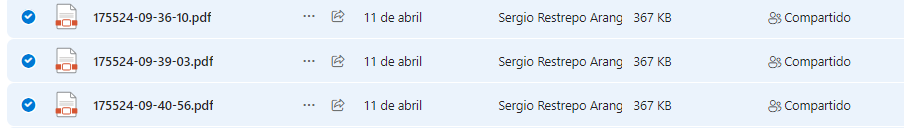

## Parece haber varios presupuestos repetidos en donde cambian algun item entre un presupuesto y el siguiente o cambia el convenio.

In [153]:
quotations[quotations['items'] == 'VOYANT OPEN FUSION DEVICE AP-EB240']

,Medico,Procedimiento,Convenio,CustomerId,CustomerName,invoiceId,items,Cantidad,Precio,Descuento_Mi_Vida
5383,SALAZAR MORA RONALD ALBERTO,HISTERECTOMÍA ABIERTA,CONVENIO: PROGRAMA DE BENEFICIOS MI VIDA,NaN,NaN,NaN,VOYANT OPEN FUSION DEVICE AP-EB240,1.0,370740.83,315129.71
13027,SALAZAR MORA RONALD ALBERTO,HISTERECTOMÍA ABIERTA,SIN CONVENIO,NaN,NaN,NaN,VOYANT OPEN FUSION DEVICE AP-EB240,1.0,370740.83,315129.71
38559,CAMPOS CASTRO ALONSO,TIROIDECTOMIA TOTAL,SIN CONVENIO,NaN,NaN,175523.0,VOYANT OPEN FUSION DEVICE AP-EB240,1.0,371007.00,315355.95
47968,SALAZAR MORA RONALD ALBERTO,HISTERECTOMÍA ABIERTA,SIN CONVENIO,NaN,NaN,176477.0,VOYANT OPEN FUSION DEVICE AP-EB240,1.0,371007.00,315355.95
92623,WRIGHT SAMUELS MICHELLE MARIE,HISTERCTOMIA ABDOMINAL TOTAL,SIN CONVENIO,205750264,RAMIREZ ROJAS ROSA LIZETH,181831.0,VOYANT OPEN FUSION DEVICE AP-EB240,1.0,353343.90,300342.31


In [154]:
quotations[quotations.invoiceId == 175524]

,Medico,Procedimiento,Convenio,CustomerId,CustomerName,invoiceId,items,Cantidad,Precio,Descuento_Mi_Vida
39068,CAMBRONERO MORAGA EFRAIN,LAPAROTOMÍA EXPLORADORA Y RESECCIÓN DE MASA RE...,CONVENIO: PAN AMERICAN LIFE INSURANCE DE COSTA...,NaN,ALTAMIRANO HERNANDEZ EVELINGH,175524.0,PAQUETE DESCART. INSUMOS,1.0,56500.00,NaN
39106,CAMBRONERO MORAGA EFRAIN,LAPAROTOMÍA EXPLORADORA Y RESECCIÓN DE MASA RE...,CONVENIO: PAN AMERICAN LIFE INSURANCE DE COSTA...,NaN,ALTAMIRANO HERNANDEZ EVELINGH,175524.0,DRENAJE JACKSONPRAT 19FR 100ml REDONDO RF11800...,1.0,40604.41,NaN
39109,CAMBRONERO MORAGA EFRAIN,LAPAROTOMÍA EXPLORADORA Y RESECCIÓN DE MASA RE...,CONVENIO: PAN AMERICAN LIFE INSURANCE DE COSTA...,NaN,ALTAMIRANO HERNANDEZ EVELINGH,175524.0,LIGASURE BLUNT TIP REF LF1637 / LF1837,1.0,410122.57,NaN
39441,CAMBRONERO MORAGA EFRAIN,LAPAROTOMÍA EXPLORADORA Y RESECCIÓN DE MASA RE...,SIN CONVENIO,NaN,ALTAMIRANO HERNANDEZ EVELINGH,175524.0,PAQUETE DESCART. INSUMOS,1.0,56500.00,56500.00
39445,CAMBRONERO MORAGA EFRAIN,LAPAROTOMÍA EXPLORADORA Y RESECCIÓN DE MASA RE...,SIN CONVENIO,NaN,ALTAMIRANO HERNANDEZ EVELINGH,175524.0,CIRUGIA MAYOR,1.0,203469.76,162775.81
39452,CAMBRONERO MORAGA EFRAIN,LAPAROTOMÍA EXPLORADORA Y RESECCIÓN DE MASA RE...,SIN CONVENIO,NaN,ALTAMIRANO HERNANDEZ EVELINGH,175524.0,RECUPERACION 1 HORA,1.0,107373.76,85899.01
39471,CAMBRONERO MORAGA EFRAIN,LAPAROTOMÍA EXPLORADORA Y RESECCIÓN DE MASA RE...,SIN CONVENIO,NaN,ALTAMIRANO HERNANDEZ EVELINGH,175524.0,OXIGENO X HORAS,4.0,12480.00,9984.00
39509,CAMBRONERO MORAGA EFRAIN,LAPAROTOMÍA EXPLORADORA Y RESECCIÓN DE MASA RE...,SIN CONVENIO,NaN,ALTAMIRANO HERNANDEZ EVELINGH,175524.0,PRECIO POR MINUTO,240.0,733867.20,587092.80
39510,CAMBRONERO MORAGA EFRAIN,LAPAROTOMÍA EXPLORADORA Y RESECCIÓN DE MASA RE...,SIN CONVENIO,NaN,ALTAMIRANO HERNANDEZ EVELINGH,175524.0,DRENAJE JACKSONPRAT 19FR 100ml REDONDO RF11800...,1.0,40604.41,34513.75
39518,CAMBRONERO MORAGA EFRAIN,LAPAROTOMÍA EXPLORADORA Y RESECCIÓN DE MASA RE...,SIN CONVENIO,NaN,ALTAMIRANO HERNANDEZ EVELINGH,175524.0,HAB. CUIDADOS INTERMEDIOS,1.0,749989.76,562492.32


In [155]:
quotations[quotations.invoiceId == 176477]

,Medico,Procedimiento,Convenio,CustomerId,CustomerName,invoiceId,items,Cantidad,Precio,Descuento_Mi_Vida
47051,SALAZAR MORA RONALD ALBERTO,HISTERECTOMÍA ABIERTA,SIN CONVENIO,NaN,NaN,176477.0,PAQUETE DESCART. INSUMOS,1.0,56500.00,56500.00
47055,SALAZAR MORA RONALD ALBERTO,HISTERECTOMÍA ABIERTA,SIN CONVENIO,NaN,NaN,176477.0,OXIGENO X HORAS,2.0,6240.00,4992.00
47060,SALAZAR MORA RONALD ALBERTO,HISTERECTOMÍA ABIERTA,SIN CONVENIO,NaN,NaN,176477.0,RECUPERACION 1 HORA,1.0,107373.76,85899.01
47064,SALAZAR MORA RONALD ALBERTO,HISTERECTOMÍA ABIERTA,SIN CONVENIO,NaN,NaN,176477.0,PRECIO POR MINUTO,120.0,366933.60,293546.40
47076,SALAZAR MORA RONALD ALBERTO,HISTERECTOMÍA ABIERTA,SIN CONVENIO,NaN,NaN,176477.0,CIRUGIA MAYOR,1.0,203469.76,162775.81
47079,SALAZAR MORA RONALD ALBERTO,HISTERECTOMÍA ABIERTA,SIN CONVENIO,NaN,NaN,176477.0,RECUPERACIÓN EXTENDIDA,1.0,312000.00,249600.00
47085,SALAZAR MORA RONALD ALBERTO,HISTERECTOMÍA ABIERTA,SIN CONVENIO,NaN,NaN,176477.0,"ALEXIS RETRACTOR ""L 9-14CM NVTEC C8403",1.0,49342.02,41940.72
47113,SALAZAR MORA RONALD ALBERTO,HISTERECTOMÍA ABIERTA,SIN CONVENIO,NaN,NaN,176477.0,FARMACOS,1.0,357000.00,303450.00
47117,SALAZAR MORA RONALD ALBERTO,HISTERECTOMÍA ABIERTA,SIN CONVENIO,NaN,NaN,176477.0,SUMINISTROS MEDICOS,1.0,395500.00,336175.00
47121,SALAZAR MORA RONALD ALBERTO,HISTERECTOMÍA ABIERTA,SIN CONVENIO,NaN,NaN,176477.0,SUTURA FILBLOC 3-0 180 17MM 20CM BLOQ FINAL FU...,1.0,23924.24,20335.60


In [156]:
quotations.head(10)

,Medico,Procedimiento,Convenio,CustomerId,CustomerName,invoiceId,items,Cantidad,Precio,Descuento_Mi_Vida
0,NO INDICADO,CESAREA,CONVENIO: ASSA COMPAÑÍA DE SEGUROS S.A. (EBS),207080166,VILLALOBOS MORERA KATHIA ROCIO,170558.0,PRECIO SALA DE OPERACIONES (60 MINUTOS),NaN,162240.000,NaN
1,CACERES CHACON ADRIAN,CRANEO SINOSTOSIS CX SUTURECTOMIA,CONVENIO: PROGRAMA DE BENEFICIOS MI VIDA,NaN,GRANADOS ESPINOZA FABIANA DANIELA,170153.0,PAQUETE DESCART. INSUMOS,1.0,56500.000,56500.000
2,ZAFRANI ZEBEDE JACOBO,COLECISTECTOMÍA LAPAROSCÓPICA,CONVENIO: PROGRAMA DE BENEFICIOS MI VIDA,NaN,NaN,170381.0,CIRUGIA MENOR,1.0,110100.640,88080.510
3,ZUÑIGA PEREZ ALBA,HERNIOPLASTIA INGUINAL LAPAROSCOPICA,CONVENIO: ASSA COMPAÑÍA DE SEGUROS S.A. (EBS),112790932,REY SOTO MOISES RAMON,170082.0,PAQUETE DESCART. INSUMOS,1.0,56500.000,NaN
4,CONTRERAS SOARES FERNANDO,REPARACIÓN ARTROSCÓPICA DE MANGUITO ROTADOR + ...,CONVENIO: PROGRAMA DE BENEFICIOS MI VIDA,NaN,FISCHEL KOPPER MAX ALBERTO,170728.0,INSUMO CASA COMERCIAL,1.0,1.117,1.061
5,VIQUEZ QUESADA NATHALY YULIANA,HISTERECTOMÍA LAPAROSCÓPICA,SIN CONVENIO,111640275,JOHANNING CORDERO JULIANA,170873.0,CIRUGIA MAYOR,1.0,201455.280,161164.220
7,ZAFRANI ZEBEDE JACOBO,COLECISTECTOMÍA LAPAROSCÓPICA,CONVENIO: PROGRAMA DE BENEFICIOS MI VIDA,NaN,NaN,170381.0,PRECIO POR MINUTO,60.0,181636.200,145309.200
8,CONTRERAS SOARES FERNANDO,REPARACIÓN ARTROSCÓPICA DE MANGUITO ROTADOR + ...,CONVENIO: PROGRAMA DE BENEFICIOS MI VIDA,NaN,FISCHEL KOPPER MAX ALBERTO,170728.0,PAQUETE DESCART. INSUMOS,1.0,67800.000,67800.000
9,NO INDICADO,CESAREA,CONVENIO: ASSA COMPAÑÍA DE SEGUROS S.A. (EBS),207080166,VILLALOBOS MORERA KATHIA ROCIO,170558.0,RECUPERACION 1 HORA (CESAREA),NaN,104177.000,NaN
10,CACERES CHACON ADRIAN,CRANEO SINOSTOSIS CX SUTURECTOMIA,CONVENIO: PROGRAMA DE BENEFICIOS MI VIDA,NaN,GRANADOS ESPINOZA FABIANA DANIELA,170153.0,RECUPERACION 1 HORA,1.0,106310.880,85048.700


In [159]:
len(quotations[quotations.invoiceId.isna()].CustomerName.unique())

637

In [161]:
lista_de_presupuestos = quotations.invoiceId.unique()

In [170]:
lista_de_presupuestos.sort()
lista_de_presupuestos

array([152597., 169588., 169951., ..., 185590., 185591.,     nan])

In [169]:
with open('lista_de_presupuestos.txt', 'w') as f:
    for numero in lista_de_presupuestos:
        f.write(f"{numero}\n")

In [171]:
quotations.columns

Index(['Medico', 'Procedimiento', 'Convenio', 'CustomerId', 'CustomerName',
       'invoiceId', 'items', 'Cantidad', 'Precio', 'Descuento_Mi_Vida'],
      dtype='object')

In [173]:
quotations_raw[quotations_raw.CustomerName == 'GOMEZ NAVARRO YANIL DEL ROSARIO']

,Medico,Procedimiento,Convenio,CustomerId,CustomerName,invoiceId,items,Cantidad,precio_unitario,precio
6,ACUÑA NAVAS MARIA JOSE,CESAREA,NaN,304570339,GOMEZ NAVARRO YANIL DEL ROSARIO,152592.0,Maternidad.\nPresupuesto No.\n152592,NaN,NaN,NaN
170,ACUÑA NAVAS MARIA JOSE,CESAREA,NaN,304570339,GOMEZ NAVARRO YANIL DEL ROSARIO,152592.0,Maternidad.\nPresupuesto No.\n152592,NaN,NaN,NaN
